<a href="https://colab.research.google.com/github/leinaxd/NOTES/blob/main/digital_image_processing/notebooks/14_active_contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMAGE SEGMENTATION
```
Author: Eichenbaum Daniel
Email: eichenbaum.daniel@gmail.com
```

This is a practical demo to understand the theory behind:
  ```
DIP Lecture 12b: Snakes, active contours, and level sets ¬Rich Radke
    https://www.youtube.com/watch?v=RJEMDkhVgqQ&list=PLuh62Q4Sv7BUf60vkjePfcOQc8sHxmnDX&index=14

Textbook: ch. 11 Digital Image Processing
  Gonzalez and Woods, 4th ed.  
  https://www.amazon.com/-/es/Rafael-Gonzalez/dp/0133356728  
  ```

(333, 500, 3)


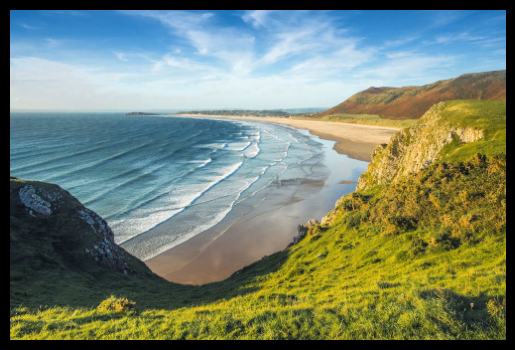

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import urllib.request
import cv2
import sklearn as sk
import skimage as ski

plt.style.use('dark_background')

url = "https://github.com/leinaxd/NOTES/raw/main/digital_image_processing/img/coast.jpg" #@param ["https://github.com/leinaxd/NOTES/raw/main/digital_image_processing/Lecture%2013/weld_defect.jpg", "https://github.com/leinaxd/NOTES/raw/main/digital_image_processing/img/coast.jpg"]
with urllib.request.urlopen(url) as url:
    img = plt.imread(url, format='jpg')
plt.imshow(img)
plt.axis('off')

print(img.shape)

r_mask = img[:, :, 0]
g_mask = img[:, :, 1]
b_mask = img[:, :, 2]

#turn image to gray
g_img = r_mask*0.2989 + g_mask*0.5870 + b_mask*0.1140
u_img = np.uint8(g_img)